# Predicting Heart disease using machine Learning

This Notebook looks into using various Python-based machine Learning and Data Science Libraries in an attempt to build a machine Learning model capable of predicting the likelyhood of someone having heart disease based on their medical attributes.

Steps we are using:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from cleavland data from the UCI Machine Learning Repository

## 3. Evaluation
The success of our model would play a very crucial role in the life of every patient.
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research or by talking to a subject matter expert.

### Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [1]:
# import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# We want our plot to appear inside the notebook

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load data
load the csv file and save it as a variable

In [2]:
df = pd.read_csv("Heart_diesease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data you're working with:
1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. Whats missing from the data & How do we deal with it.
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove Features to get more out of your data.

In [3]:
# Let's find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

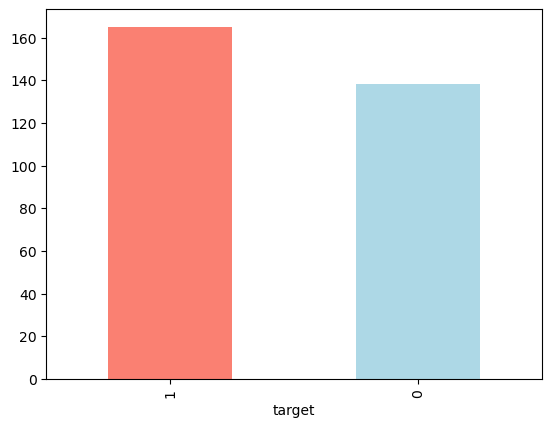

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "Lightblue"]);

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency in relation to Sex

In [12]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [4]:
pd.crosstab(index=df.target, columns=df.sex)

sex,0,1
target,,
0,24,114
1,72,93


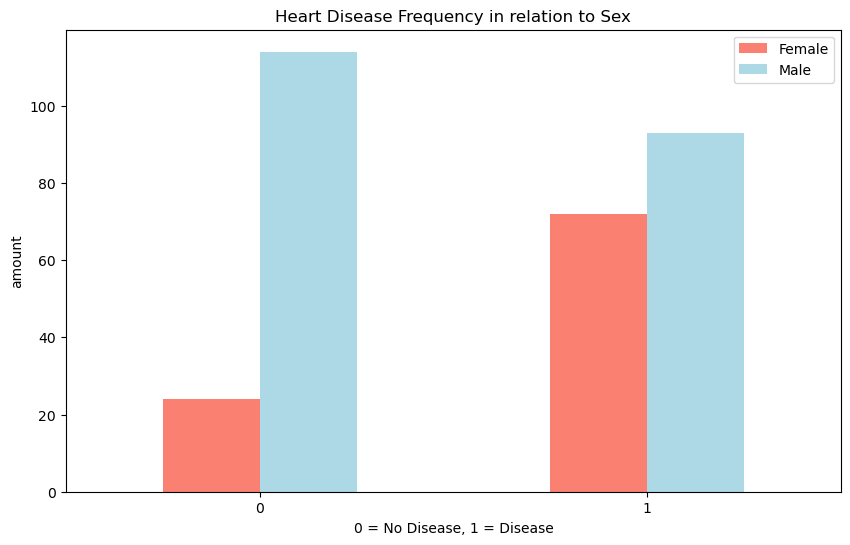

In [5]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "Lightblue"]
);
plt.title("Heart Disease Frequency in relation to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

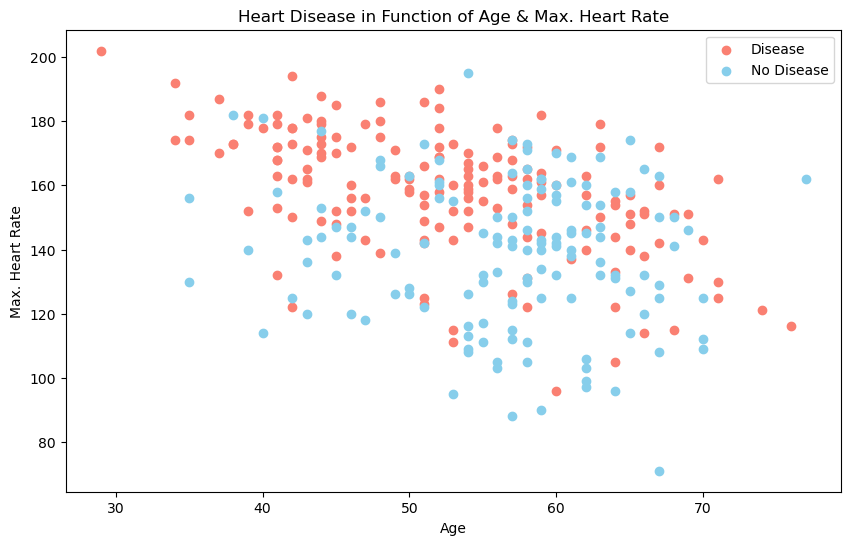

In [4]:
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate", loc="center");
"""My inference from the scatter plot is that the older a patient is,
the lower their max. heart rate."""

# Scatter with negative examples

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="skyblue");
# Add a little bit of helpful info
plt.legend(["Disease", "No Disease"])
plt.title("Heart Disease in Function of Age & Max. Heart Rate");

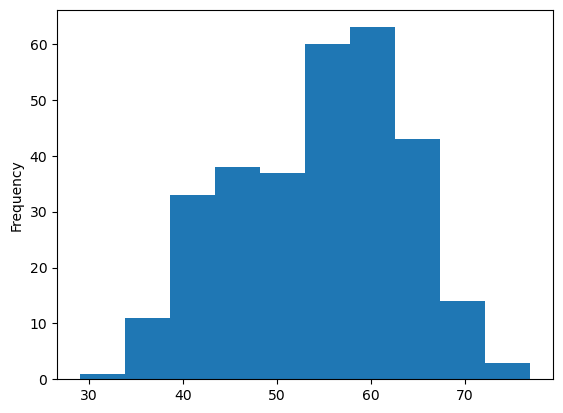

In [23]:
# Check the distribution of the age column with an histogram
df.age.plot(kind="hist");

### Heart Disease Frequency Per Chest Pain Type
 0. Typical angina (chest pain), 
 1. Atypical angina (chest pain not related to heart), 
 2. Non-anginal pain (typically esophageal spasms (non heart related), 
 3. Asymptomatic (chest pain not showing signs of disease)

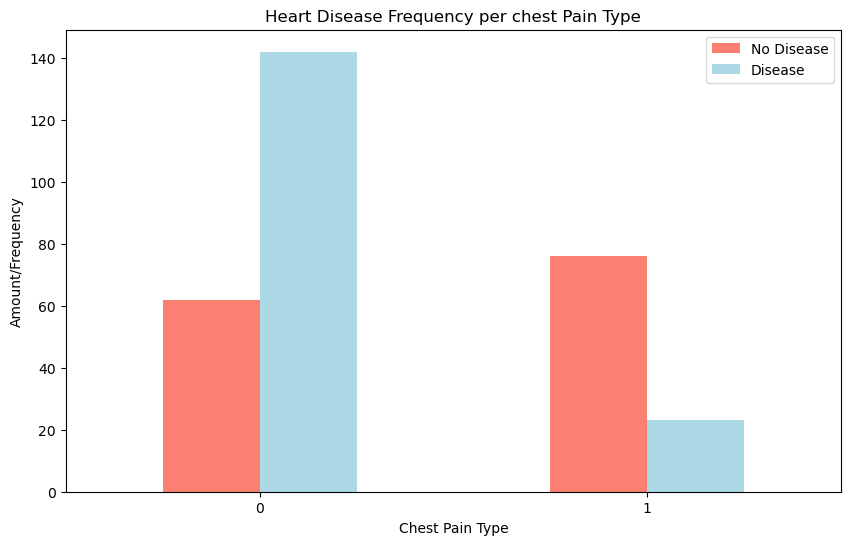

In [16]:
pd.crosstab(df.exang, df.target).plot(kind="bar",
                                  figsize=[10, 6],
                                  color=["salmon", "lightblue"])
plt.legend(["No Disease", "Disease"])
plt.xlabel("Chest Pain Type")
plt.title("Heart Disease Frequency per chest Pain Type")
plt.ylabel("Amount/Frequency")
plt.xticks(rotation=0);

In [5]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


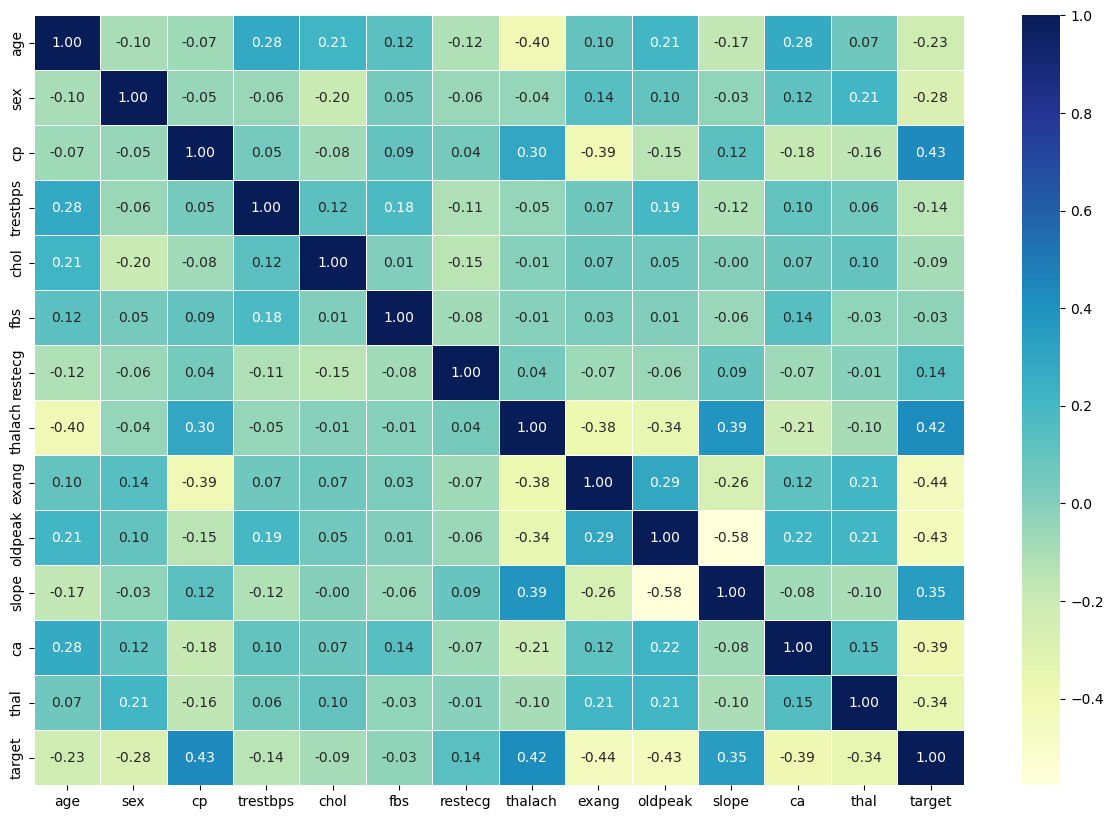

In [3]:
# Lets make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

### 5. Modelling

In [3]:
# Split data into X and Y
x = df.drop("target", axis=1)
y = df["target"]

In [4]:
# Split into train and test sets
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)

### We would try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [5]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """Fits and evaluates given machine learning models"""
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # fits the model in the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to models_scores dict.
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [6]:
Model_Score = fit_and_score(models, x_train, x_test, y_train, y_test)
Model_Score

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

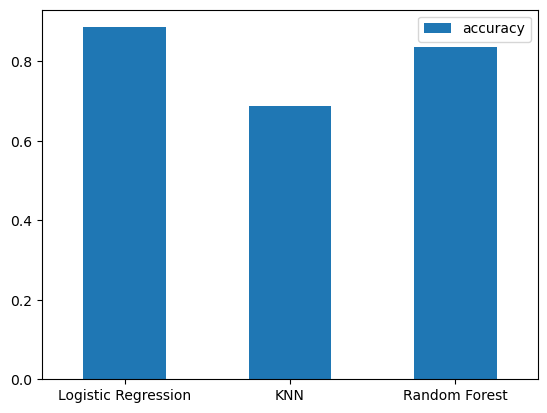

In [19]:
# Lets visualize the comparison between the 3 ML models used
model_compare = pd.DataFrame(Model_Score, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

### So we end up with Logistic Regression and Random Forest as the best performers from the scoring function......
And we know that our models first fit() and score() predictions aren't always what we should base our project off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature Importance
* Confusion matrix
* cross_val()
* Preecision
* Recall
* f1 score
* classification report
* ROC curve
* Area under the curve (AUC)


### Hyperparameter tuning

In [7]:
# Let's tune KNN

train_scores = []
test_scores = []

# We would then Create a list of different values for n_neighbours
neighbors = range(1, 21)

# Setup KNN instance
KNN = KNeighborsClassifier()

# Loop through different n_neighbours 
for _ in neighbors:
    KNN.set_params(n_neighbors=_)

    # fit the algorithm
    KNN.fit(x_train, y_train)
    # Update the list of train scores
    train_scores.append(KNN.score(x_train, y_train))
    # Update the list of test score
    test_scores.append(KNN.score(x_test, y_test))

In [16]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

Maximum KNN score on the test data: 75.41%


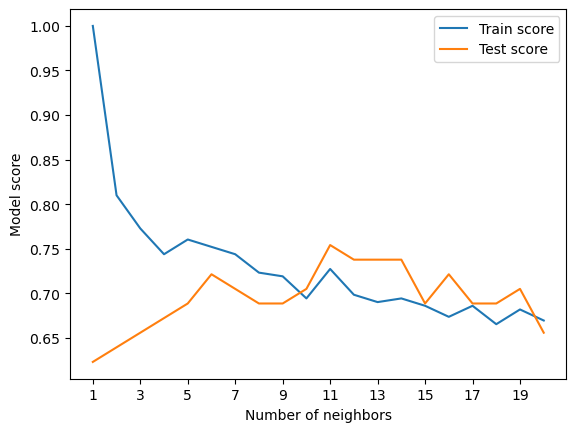

In [9]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 2))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");  

### Hyperparameter tuning with RandomizedSearchCV()

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

..... Using RandomizedSearchCV

In [21]:
# Create a hyperparameter grid for logisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear", "lbfgs"],
               "penalty": ["l1", "l2"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameters grids setup for each of our models,
Lets tune them using RandomizedSearchCV.....

In [22]:
# Tune LogisticRegression

np.random.seed(42)

# Setup Random Hyperparameter search for LogisticRegression
randomized_search_logreg = RandomizedSearchCV(LogisticRegression(),
                                             param_distributions=log_reg_grid,
                                             cv=5,
                                             n_iter=20,
                                             verbose=True)

# fit random hyperprameter search model for LogisticRegression
randomized_search_logreg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [15]:
randomized_search_logreg.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 2500, 'C': 206.913808111479}

In [23]:
Final_score = randomized_search_logreg.score(x_test, y_test)
print(f"After hyperparameter tuning of the logisticRegression model," 
f"we end up with {Final_score*100:.2f}%")

After hyperparameter tuning of the logisticRegression model,we end up with 88.52%


Now we've tuned logisticRegression(), lets do the same for RandomForestClassifier().....

In [12]:
# setup Random Seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier(0
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [20]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [44]:
Final_rs_score = rs_rf.score(x_test, y_test)
print(f"The final score after hyperparameter tuning using RandomizedSearchCV"
f"is {Final_rs_score*100:.2f}%")

The final score after hyperparameter tuning using RandomizedSearchCVis 86.89%


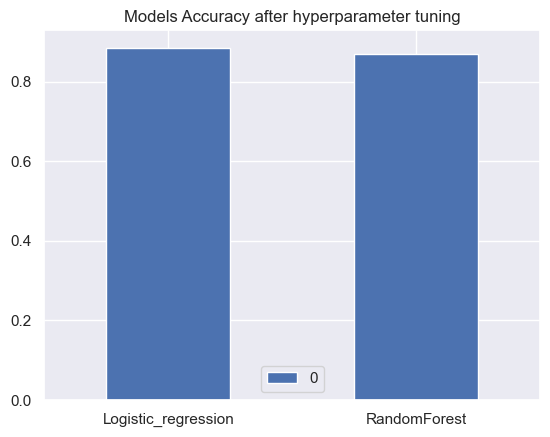

In [47]:
# Lets visualize the models accuracy after hyperparameter tuning
models_accuracy = pd.DataFrame({"Logistic_regression": Final_score,
                               "RandomForest": Final_rs_score},
                              index=[0])
models_accuracy.T.plot.bar(title="Models Accuracy after hyperparameter tuning")
plt.xticks(rotation=0);

### Hyperparameter tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV....

In [24]:
# Different Hyperparameters for our LogisticRegression Model
logreg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear", "lbfgs"],
               "penalty": ["l1", "l2"]}

# Setup grid hyperparameter search for LogisticRegression
gs_logreg = GridSearchCV(LogisticRegression(),
                        param_grid=logreg_grid,
                        cv=5,
                        verbose=True)
# fit grid hyperparameter search model
gs_logreg.fit(x_train, y_train);

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [26]:
# Check the best hyperparameters
gs_logreg.best_params_

{'C': 0.20433597178569418, 'penalty': 'l2', 'solver': 'liblinear'}

In [25]:
# Evaluate the grid search LogisticRegression Model
gs_logreg.score(x_test, y_test)

0.8852459016393442

### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Recall
* Precision
* F1 score
....... Endeavor to use cross val as often as possible

In [11]:
# Make predictions with tuned model
y_preds = gs_logreg.predict(x_test)

In [18]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [19]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

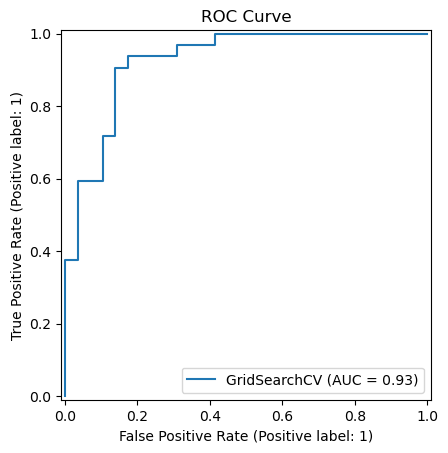

In [12]:
# import ROC curve and plot the Roc and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_logreg, x_test, y_test)
plt.title("ROC Curve")
plt.show()

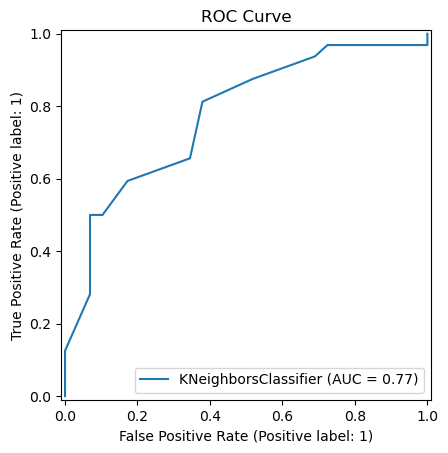

In [16]:
RocCurveDisplay.from_estimator(KNN, x_test, y_test)
plt.title("ROC Curve")
plt.show()

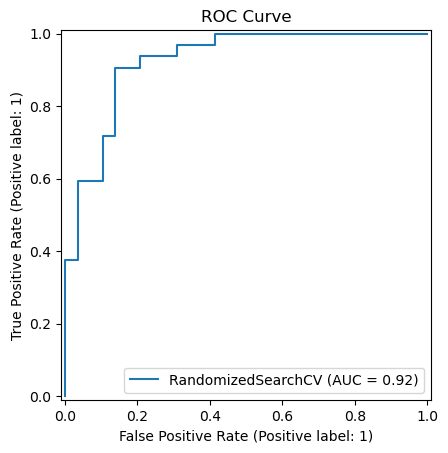

In [21]:
RocCurveDisplay.from_estimator(randomized_search_logreg, x_test, y_test)
plt.title("ROC Curve")
plt.show()

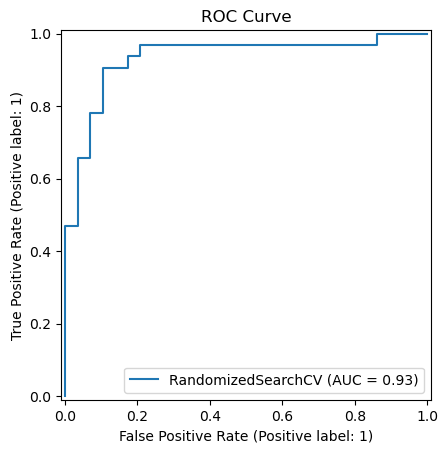

In [22]:
RocCurveDisplay.from_estimator(rs_rf, x_test, y_test)
plt.title("ROC Curve")
plt.show()

In [23]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [17]:
sns.set(font_scale=1.0)

def plot_conf_mat(Y_test, Y_preds):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_preds),
                    annot=True,
                    cbar=True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

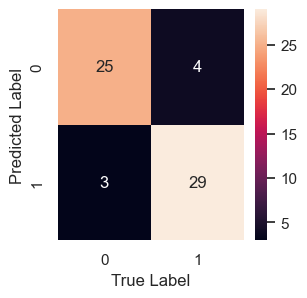

In [31]:
plot_conf_mat(y_test, y_preds)

Now we've got a ROC Curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [32]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Evaluation metrics using cross validation
Classification properties are better calculated using cross-validation. `Cross-val-score`

In [30]:
# We would set up our cross validation with the best parameters
clf = LogisticRegression(C=0.20433597178569418, 
                         penalty=l2, solver=liblinear)

NameError: name 'l2' is not defined

In [14]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")

In [19]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [15]:
# cross-validated precision
cv_prec = cross_val_score(clf,
                          x,
                          y,
                          cv=5,
                          scoring="precision")

In [20]:
cv_prec = np.mean(cv_prec)
cv_prec

0.8215873015873015

In [16]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring="recall")

In [21]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [17]:
# cross-validated f1 score
cv_f1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [22]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

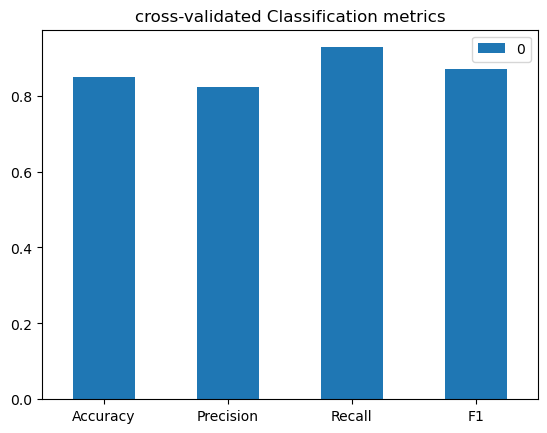

In [23]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="cross-validated Classification metrics")
plt.xticks(rotation=0);

### Feature importance
Feature importance is another way of asking, "Which features contributed to the outcomes of the model and how did they contribute?".
One way to find feature importance is to search for "(MODEL NAME) feature importance"

In [24]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [25]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [26]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

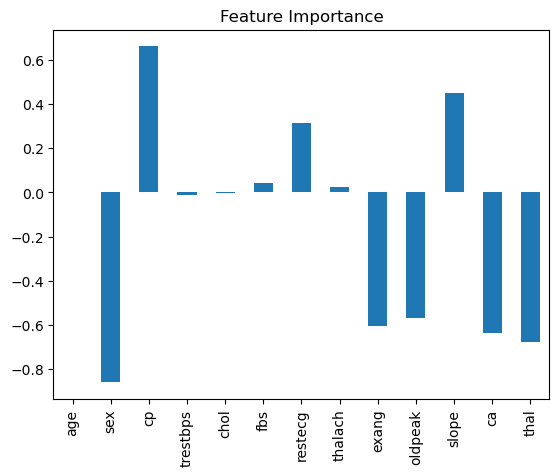

In [27]:
# Visualize Feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

## Experimentation

If you haven't hit your evaluation metric yet... ask yourself....
* Could you collect more data?
* Could you try a better model? like Catboost or XGBoost
* Could you improve the current models?